In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv("logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# Basic Metric

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.tail()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [5]:
df.shape

(396030, 27)

In [6]:
df.ndim

2

In [7]:
df.size

10692810

In [8]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# Handling Null values

In [10]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [11]:
Null_percetage=df.isnull().sum()/len(df)*100
Null_percetage.sort_values(ascending=False).head(6)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443401
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64

- mort_acc has 9.54% Missing values
- emp_title has 5.78% Missing values
- emp_length has 4.62% Missing values
- title has 0.44% Missing values
- pub_rec_bankruptcies has 0.13% Missing values
- revol_util has 0.06% Missing values

# Non Graphical Analysis

In [12]:
value_count=['term','grade','verification_status','loan_status','purpose',
            'initial_list_status','application_type']

for i in value_count:
    print("value count for",i)
    print(df[i].value_counts(normalize=True)*100)
    print("*"*100)
    print('\n')


value count for term
term
 36 months    76.258112
 60 months    23.741888
Name: proportion, dtype: float64
****************************************************************************************************


value count for grade
grade
B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: proportion, dtype: float64
****************************************************************************************************


value count for verification_status
verification_status
Verified           35.240512
Source Verified    33.175517
Not Verified       31.583971
Name: proportion, dtype: float64
****************************************************************************************************


value count for loan_status
loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64
****************************************************************************************************


value count for 

# Graphical Analysis

### Univariate Analysis

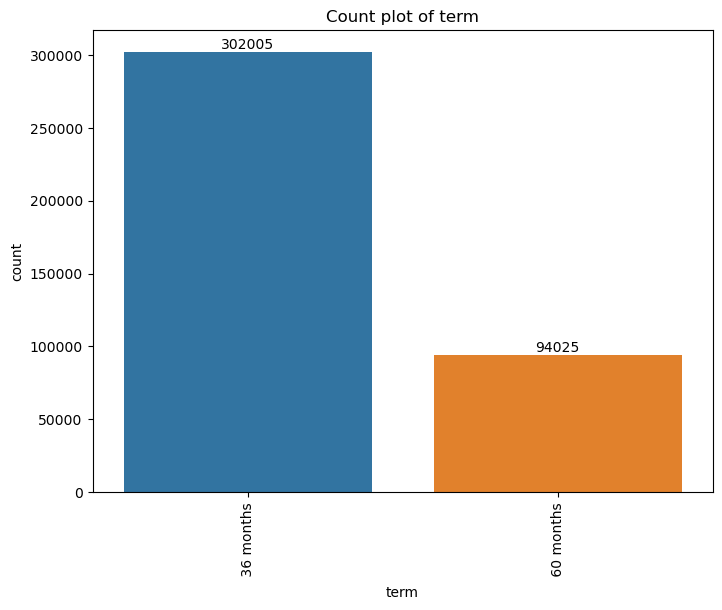

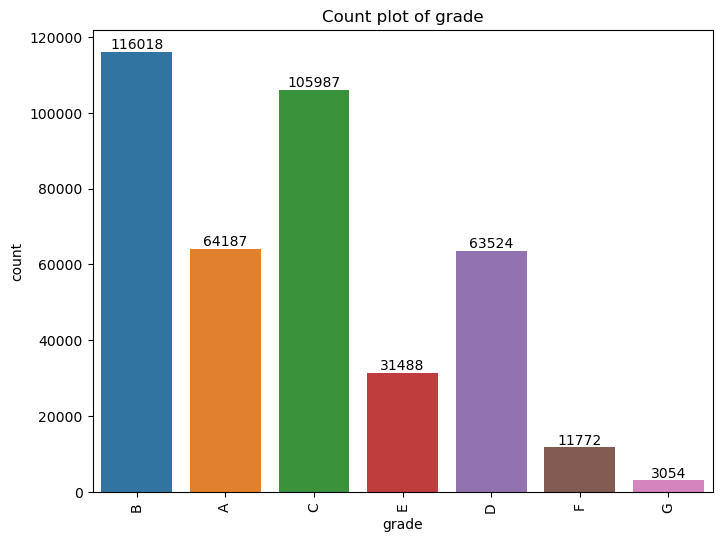

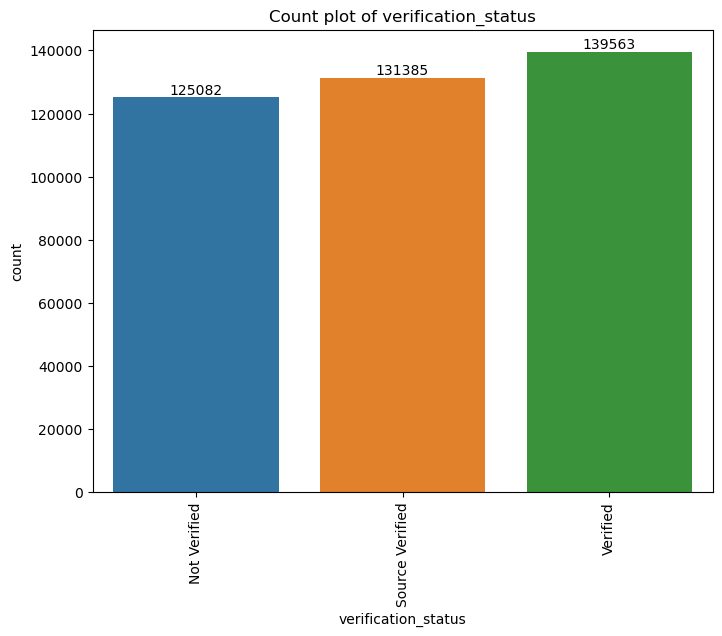

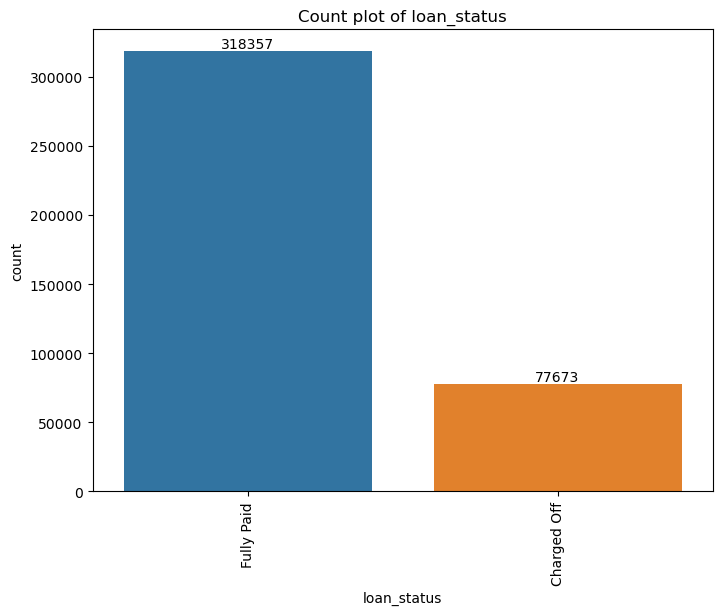

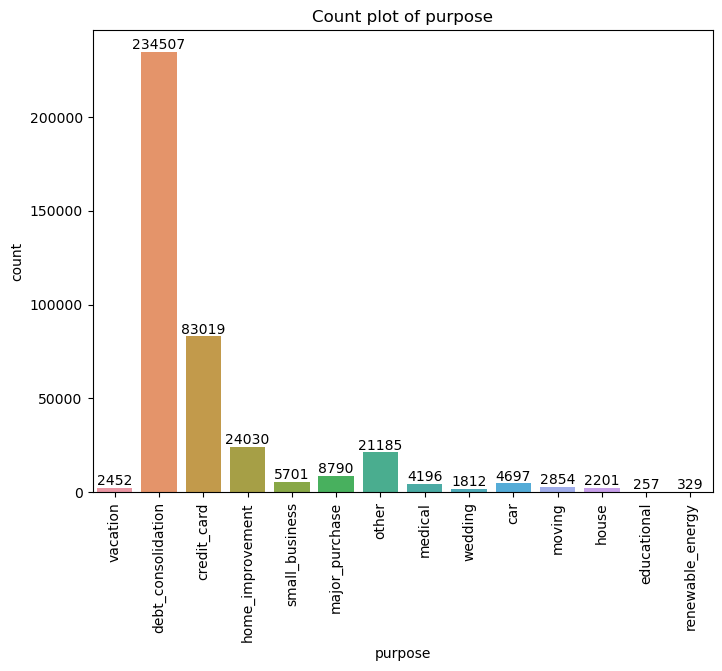

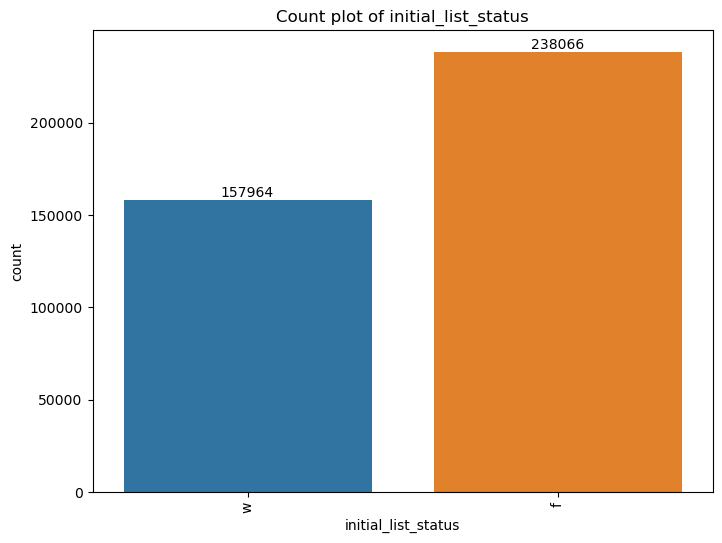

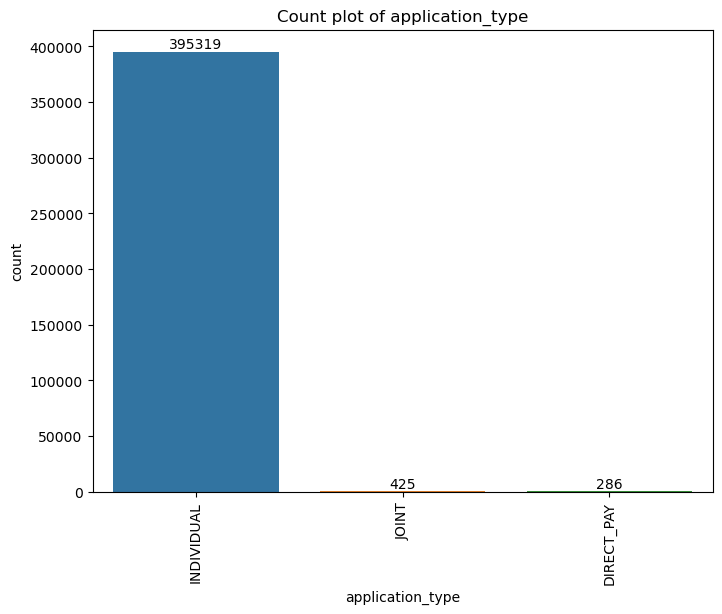

In [13]:
count_plot = ['term', 'grade', 'verification_status', 'loan_status', 'purpose',
              'initial_list_status', 'application_type']

for i in count_plot:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=i)
    plt.title(f"Count plot of {i}")
    plt.xticks(rotation=90)
    ax=plt.gca()
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()


- Most customers are borrowing loans with a 36-month term.
- Grades B and C have almost the same distribution.
- The loan status is evenly distributed across the three categories.
- The majority of people are borrowing loans for debt consolidation.
- Most people are borrowing loans as individuals compared to joint applications or direct pay options.

### Bivariate analysis


In [14]:
grade = sorted(df.grade.unique().tolist())
sub_grade = sorted(df.sub_grade.unique().tolist())

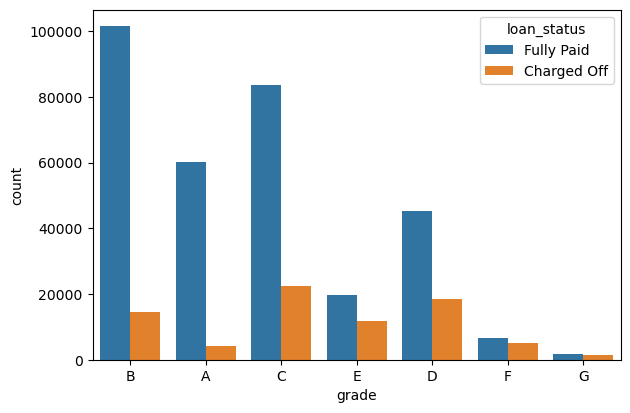

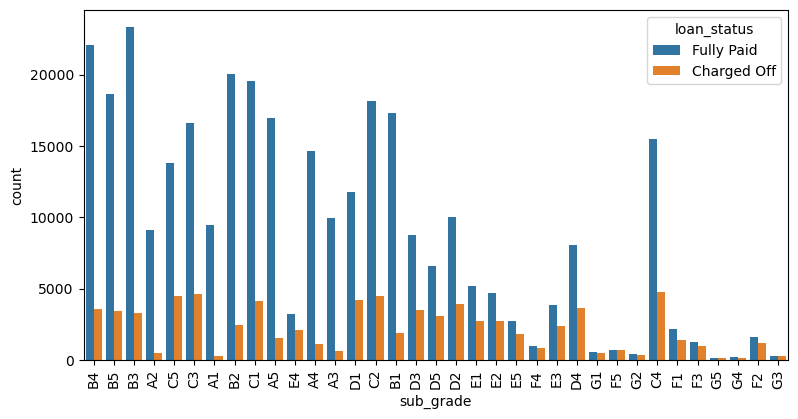

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='grade', data=df, hue='loan_status')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
sns.countplot(x='sub_grade', data=df, hue='loan_status')
plt.xticks(rotation=90)
plt.show()

## Insights

- The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

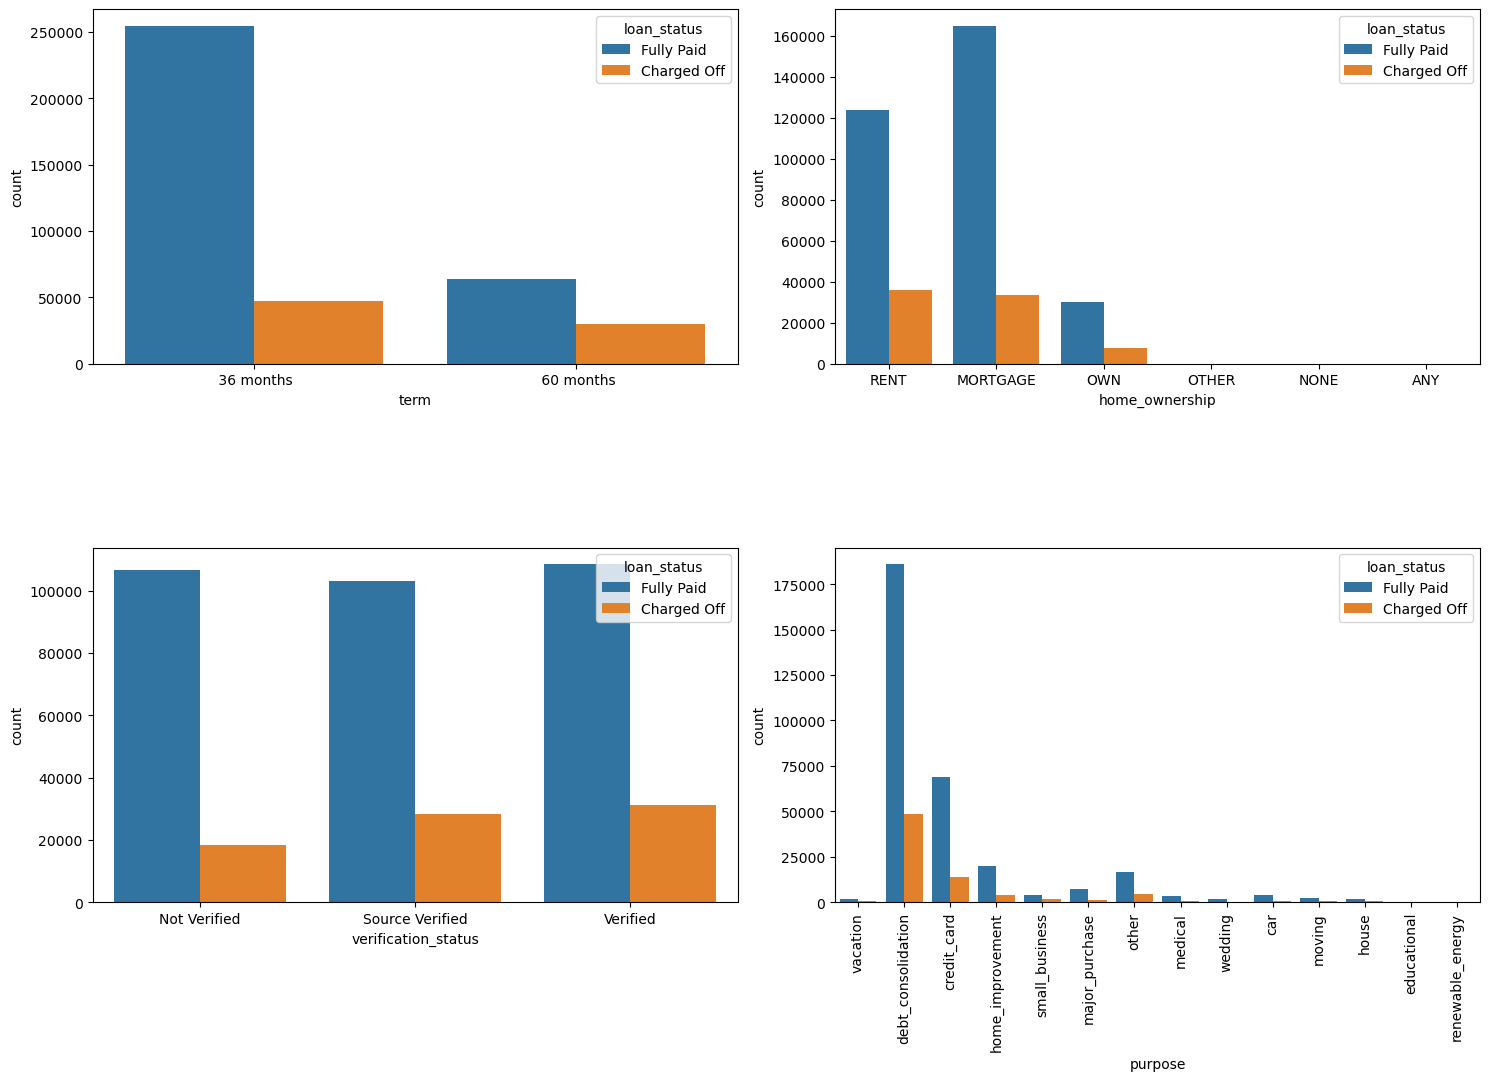

In [16]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
sns.countplot(x='purpose', data=df, hue='loan_status')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Insights

- Most of the people took loan for 36 months and full paid on time
- Most of people have home ownership as mortgage and rent
- Most of the people took loan for debt consolidations

In [17]:
# Correlation

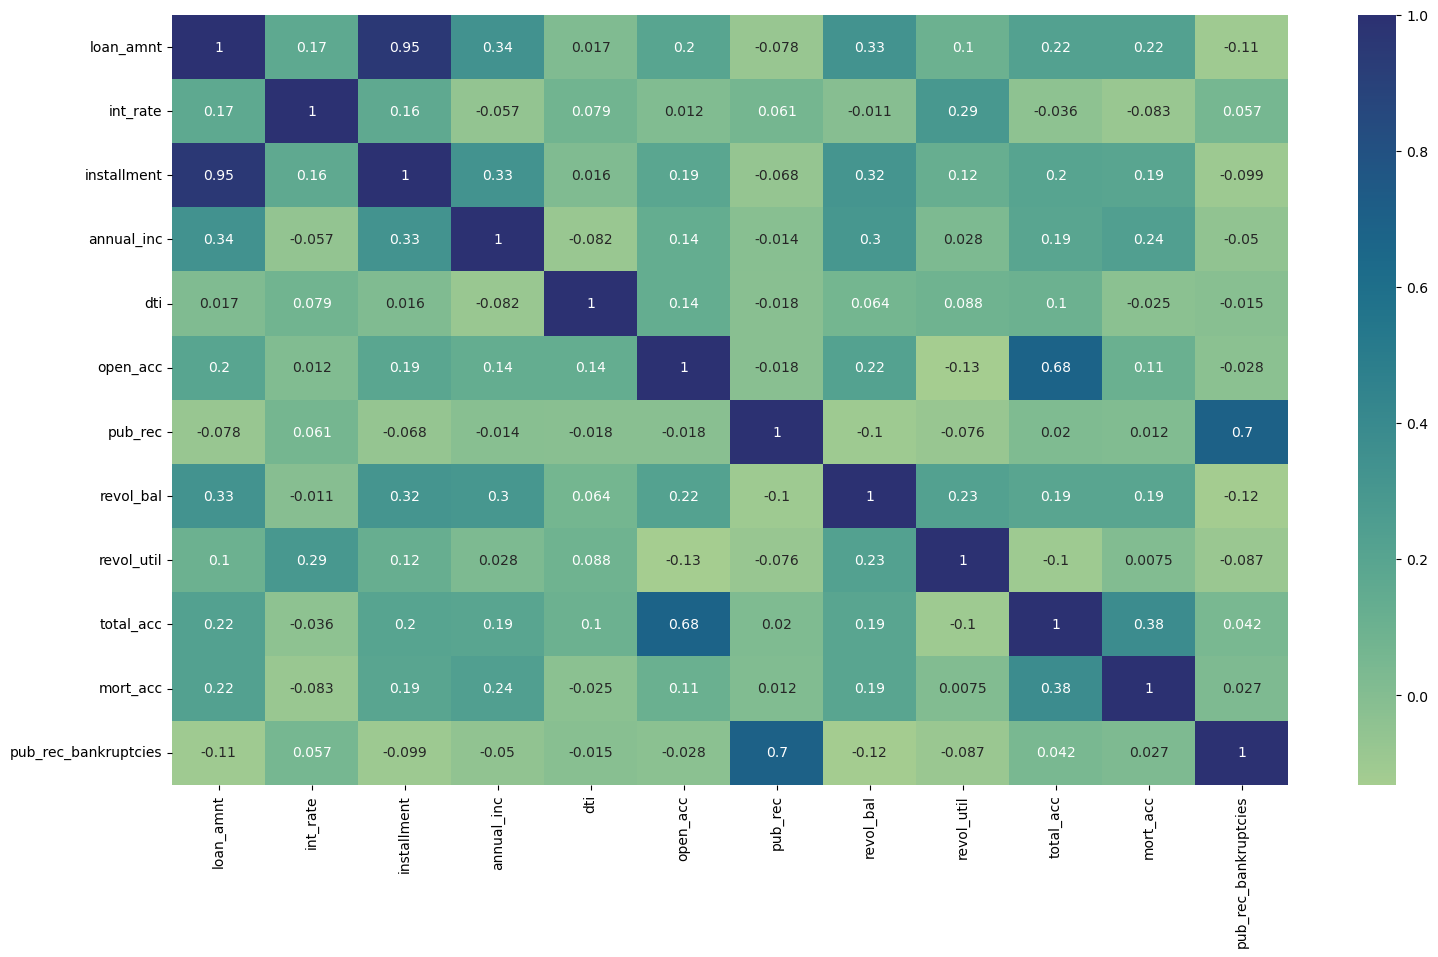

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True),cmap='crest',annot=True)
plt.show()

- We can say that almost perfect correlation between "loan_amnt" the "installment" feature.
- So, we can drop either one of those columns.


In [19]:
df.drop(columns=['installment'],axis=1,inplace=True)


# DataPreprocessing

### Duplicatevalue check

In [20]:
df.duplicated().value_counts()

False    396030
Name: count, dtype: int64

- There is no duplicate data

### Missing value treatment

In [21]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [22]:
null_val=df.isna().sum()/len(df)*100
null_val.sort_values(ascending=False).head(6)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443401
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64

- mort_acc has 9.54% Missing values
- emp_title has 5.78% Missing values
- emp_length has 4.62% Missing values
- title has 0.44% Missing values
- pub_rec_bankruptcies has 0.13% Missing values
- revol_util has 0.06% Missing values

In [23]:
df['mort_acc'] = df['mort_acc'].fillna(0.0)
df['emp_title'] = df['emp_title'].fillna("unknown_emp_title")
df['emp_length'] = df['emp_length'].fillna("unknown_emp_length")
df['title'] = df['title'].fillna("unknown_title")
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0.0)

In [24]:
df.shape

(396030, 26)

In [25]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_title                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                     0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
address                   0
dtype: int64

In [26]:
df.dropna(axis=0, inplace=True)

In [27]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [28]:
df.shape

(395754, 26)

### Outlier treatment

In [29]:
numerical_data = df.select_dtypes(include='number')
numerical_data.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [30]:
num_cols = numerical_data.columns


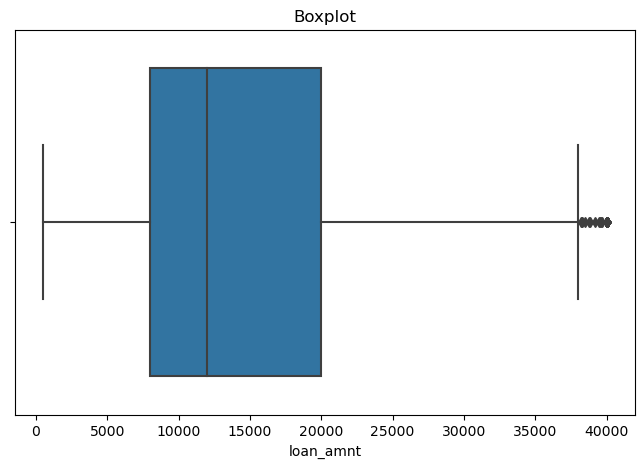

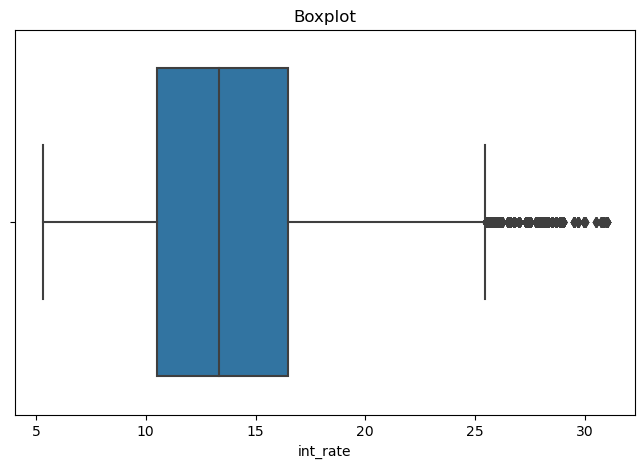

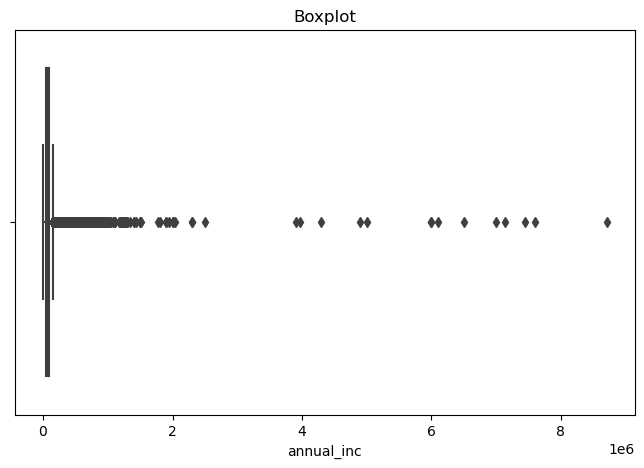

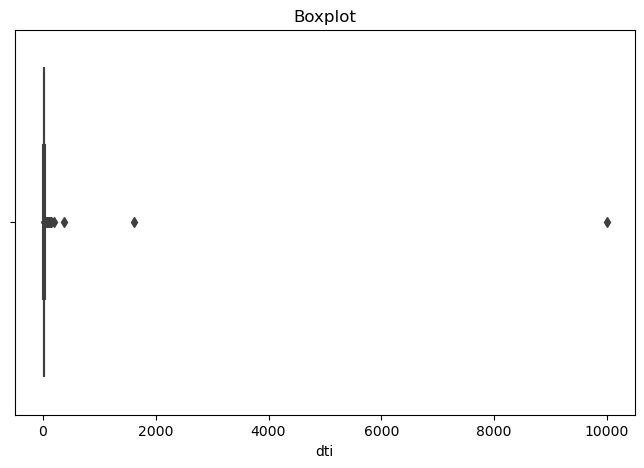

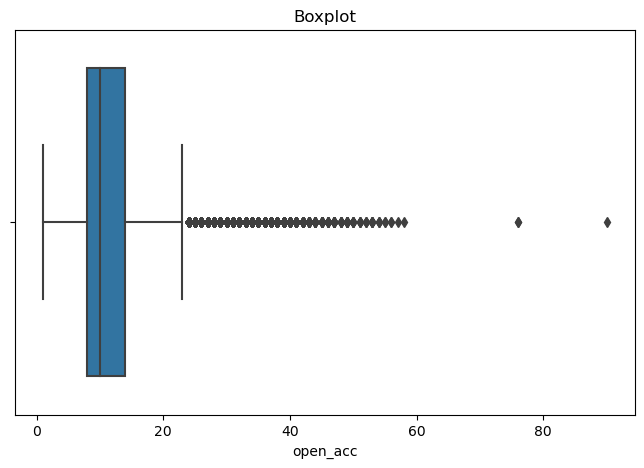

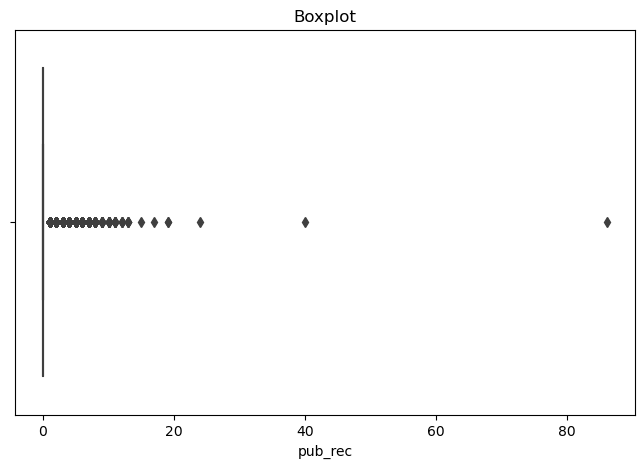

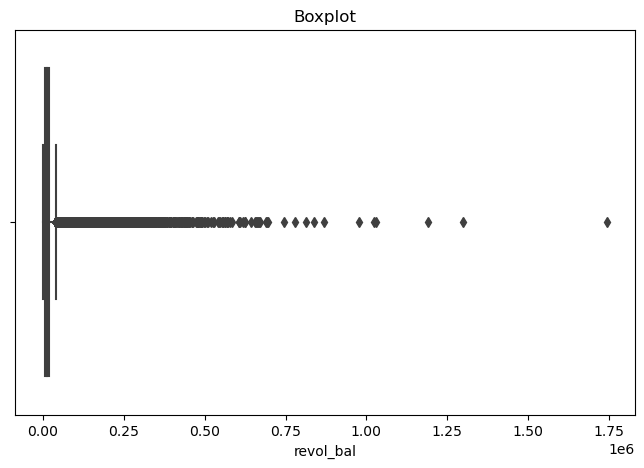

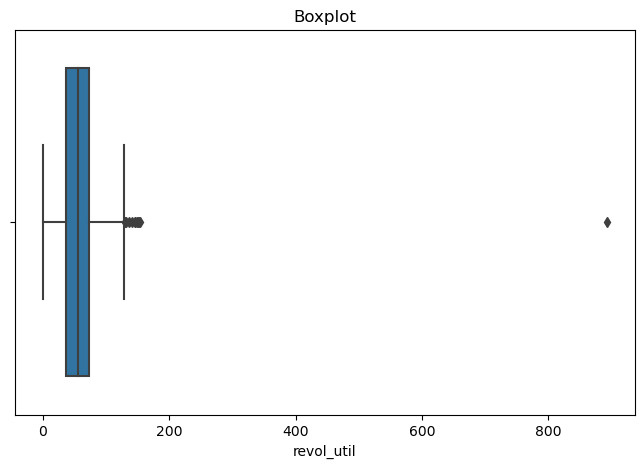

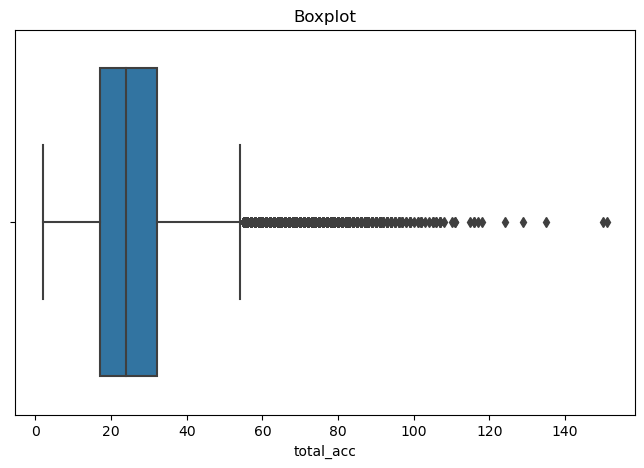

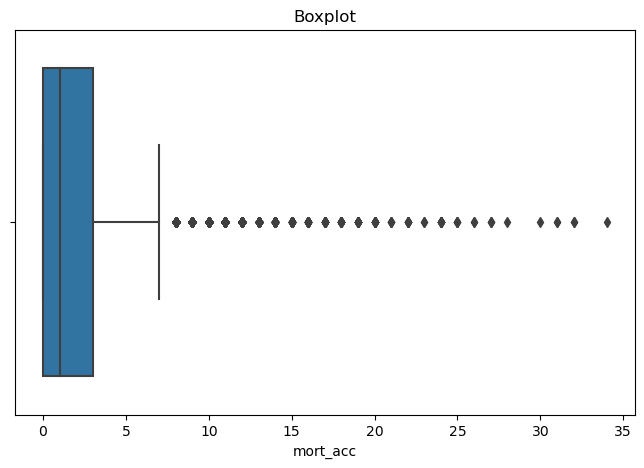

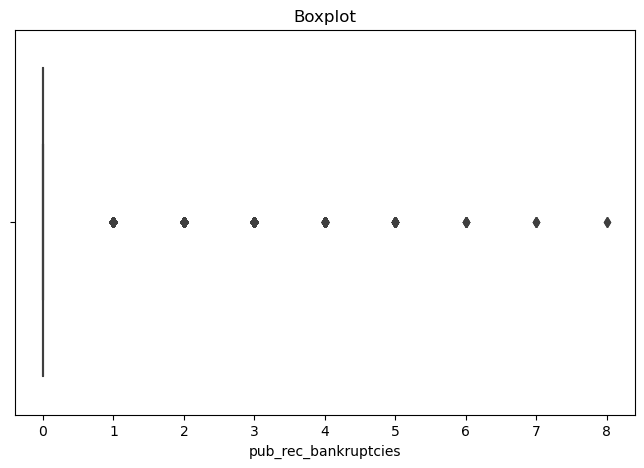

In [31]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()

for col in num_cols:
    box_plot(col)

In [32]:
for col in num_cols:
    mean=df[col].mean()
    std=df[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

df.shape

(365272, 26)

# Data Preprocesing

### Feature Engineering

In [33]:
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [34]:
#Term
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

In [35]:
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

In [36]:
df.address

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 365272, dtype: object

In [37]:
# Extract ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])


In [38]:
# Dropping some variables which we can let go for now
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365272 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             365272 non-null  float64
 1   term                  365272 non-null  int64  
 2   int_rate              365272 non-null  float64
 3   grade                 365272 non-null  object 
 4   home_ownership        365272 non-null  object 
 5   annual_inc            365272 non-null  float64
 6   verification_status   365272 non-null  object 
 7   loan_status           365272 non-null  int64  
 8   purpose               365272 non-null  object 
 9   dti                   365272 non-null  float64
 10  open_acc              365272 non-null  float64
 11  pub_rec               365272 non-null  float64
 12  revol_bal             365272 non-null  float64
 13  revol_util            365272 non-null  float64
 14  total_acc             365272 non-null  float64
 15  initi

## One-hot Encoding

In [40]:
dummies = ['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [41]:
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [42]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,0,26.24,16.0,0.0,36369.0,41.8,25.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,8000.0,36,11.99,65000.0,0,22.05,17.0,0.0,20131.0,53.3,27.0,1,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,15600.0,36,10.49,43057.0,0,12.79,13.0,0.0,11987.0,92.2,26.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,7200.0,36,6.49,54000.0,0,2.60,6.0,0.0,5472.0,21.5,13.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,24375.0,60,17.27,55000.0,1,33.95,13.0,0.0,24584.0,69.8,43.0,1,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0


## Preparing data for Modelling

In [43]:
# Drop target varable
X=df.drop('loan_status',axis=1)
y=df['loan_status']


In [44]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

In [45]:
print("X_train shape ",X_train.shape)
print("X_test shape",X_test.shape)

X_train shape  (255690, 50)
X_test shape (109582, 50)


## standardizing data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [47]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.889


## Confusion Matrix

In [49]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[87445   583]
 [11543 10011]]


## Classification Report

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     88028
           1       0.94      0.46      0.62     21554

    accuracy                           0.89    109582
   macro avg       0.91      0.73      0.78    109582
weighted avg       0.90      0.89      0.87    109582



ROC Curve -
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:
- FPR=(FP)/(FP+TN)

## AUC (Area under the ROC Curve)

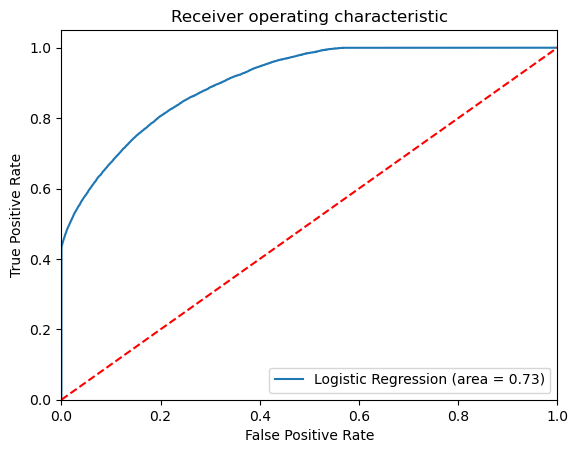

In [51]:
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

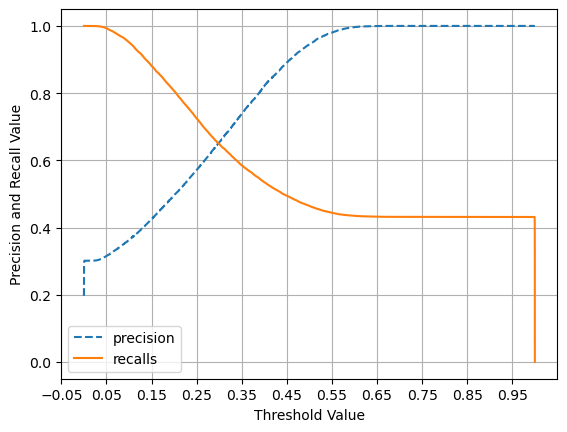

In [52]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,logreg.predict_proba(X_test)[:,1])

## Multicollinearity check using Variance Inflation Factor (VIF)

##### VIF = 1/1-R2



In [53]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,loan_amnt,7.350773
1,term,27.353973
2,int_rate,122.108872
3,annual_inc,8.258696
4,dti,8.107085
5,open_acc,14.090843
6,pub_rec,5.575610
7,revol_bal,4.761576
8,revol_util,9.482476
9,total_acc,13.022702


In [54]:
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
43,application_type_INDIVIDUAL,1579.331173
45,home_ownership_MORTGAGE,852.150288
49,home_ownership_RENT,724.668686
48,home_ownership_OWN,165.621584
2,int_rate,122.108872
14,purpose_debt_consolidation,50.950153
1,term,27.353973
13,purpose_credit_card,18.718535
5,open_acc,14.090843
9,total_acc,13.022702


In [55]:
columns = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
columns

['term',
 'int_rate',
 'open_acc',
 'total_acc',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'grade_C',
 'grade_D',
 'application_type_INDIVIDUAL',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT']

In [56]:
X.drop(columns = columns, axis = 0, inplace = True)

In [57]:
X.head()

,loan_amnt,annual_inc,dti,pub_rec,revol_bal,revol_util,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_JOINT,home_ownership_NONE,home_ownership_OTHER
0,10000.0,117000.0,26.24,0.0,36369.0,41.8,0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,8000.0,65000.0,22.05,0.0,20131.0,53.3,1,3.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,43057.0,12.79,0.0,11987.0,92.2,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,7200.0,54000.0,2.60,0.0,5472.0,21.5,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,55000.0,33.95,0.0,24584.0,69.8,1,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [58]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [59]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (410792, 50)
After OverSampling, the shape of train_y: (410792,) 

After OverSampling, counts of label '1': 205396
After OverSampling, counts of label '0': 205396


In [60]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     88028
           1       0.49      0.81      0.61     21554

    accuracy                           0.80    109582
   macro avg       0.72      0.80      0.74    109582
weighted avg       0.86      0.80      0.81    109582



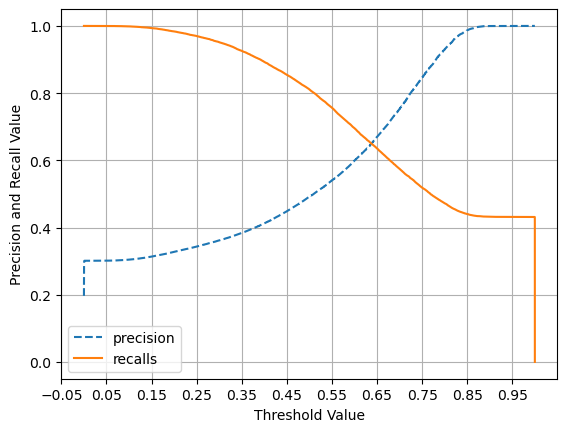

In [61]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])

In [62]:
data = pd.read_csv('logistic_regression.csv')
data.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


# Questions

**What percentage of customers have fully paid their Loan Amount?**

In [63]:
data['loan_status'].value_counts(normalize = True) * 100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

- 80% of people have successfully repaid their loans, while 20% still have outstanding payments.

**Comment about the correlation between Loan Amount and Installment features.**

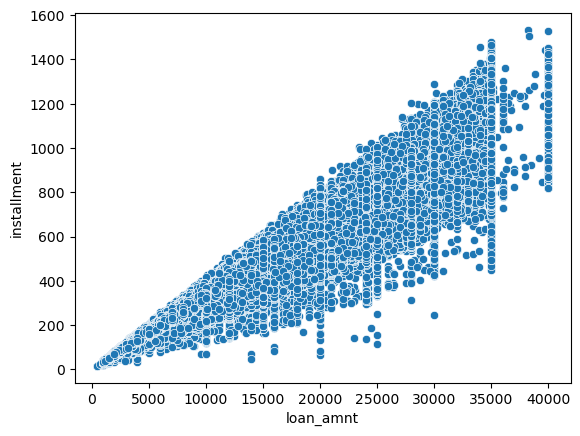

In [64]:
sns.scatterplot(data = data, x = 'loan_amnt', y = 'installment')
plt.show()

- The high correlation between the loan amount and the installment feature is causing issues with multicollinearity.

**The majority of people have home ownership as ?**

In [65]:
data['home_ownership'].value_counts(normalize = True) * 100

home_ownership
MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: proportion, dtype: float64

- The majority of homeowners fall into the categories of either having a mortgage or renting.

**People with grades ‘A’ are more likely to fully pay their loan. (T/F)**

In [66]:
data.groupby('grade')['loan_status'].value_counts(normalize = True)

grade  loan_status
A      Fully Paid     0.937121
       Charged Off    0.062879
B      Fully Paid     0.874270
       Charged Off    0.125730
C      Fully Paid     0.788191
       Charged Off    0.211809
D      Fully Paid     0.711322
       Charged Off    0.288678
E      Fully Paid     0.626366
       Charged Off    0.373634
F      Fully Paid     0.572120
       Charged Off    0.427880
G      Fully Paid     0.521611
       Charged Off    0.478389
Name: proportion, dtype: float64

- True . Grade 'A' borrowers demonstrate a significantly high likelihood of fully repaying their loans, with approximately 93.71% of loans being fully paid

**Name the top 2 afforded job titles.**

In [67]:
data['emp_title'].value_counts().head(2)

emp_title
Teacher    4389
Manager    4250
Name: count, dtype: int64

- The Most afforded job titles are Teachers & Managers

##### Thinking from a bank's perspective, which metric should our primary focus be on
##### ROC AUC
##### Precision
##### Recall
##### F1 Score

- From a bank's perspective, minimizing risks and maximizing profitability are paramount. ROC AUC (Receiver Operating Characteristic Area Under Curve) is indeed a crucial metric because it
encompasses both True Positive Rate (TPR) and False Positive Rate (FPR)


**How does the gap in precision and recall affect the bank?**
- To comprehend the errors made by a model, it's crucial to evaluate both false positives and false negatives, which are gauged through metrics like recall and precision. When recall is low, it poses a significant risk for
the bank.
- So, the gap between precision and recall will affect the bank. As the gap widens, there will be increase in incorrect predictions.


**Which were the features that heavily affected the outcome**
- Address(Zipcode), Annual_Income, Grade seems to be most important feature in our case.
- Loan duration term , Total Credit balance revol_bal , : Monthly debt vs. monthly income ratio dti , Interest int_rate also has high weights(coeffients) in the model .


**Will the results be affected by geographical location**
- Yes, we can see that zip_code (Address) is a very important feature so geographical location has impact on our result.

## Recommendations

- **Optimizing Loan Approval Strategy:**

 - Focus on improving the F1 score and maximizing the area under the Precision-Recall Curve to effectively balance precision and recall. This approach helps to identify a higher number of defaulters while minimizing false positives, improving overall risk management.

- **Policy Adjustments Based on Insights:**

 - Apply stricter scrutiny to loans with lower grades and consider adjusting interest rates to reflect the associated higher risk.
 - Implement targeted risk management strategies for high-risk zip codes, including additional verification measures or higher interest rates.
 - For small business loans, introduce enhanced financial health assessments and require collateral to mitigate the risk of default.